+ 작성일: 2018-06-15
+ https://www.kaggle.com/c/titanic/data

# 1. Data Load

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, Embarked에 결측값 발견
+ Age: 714
+ Cabin: 204 
+ Embarked:889


#  Pclass, Sex 별로 Age 데이터 보간 
print(df.groupby(['Pclass','Sex'])['Age'].mean())

Pclass1_female = (df['Pclass'] == 1) & (df['Sex'] == 'female')
Pclass1_male = (df['Pclass'] == 1) & (df['Sex'] == 'male')

Pclass2_female = (df['Pclass'] == 2) & (df['Sex'] == 'female')
Pclass2_male = (df['Pclass'] == 2) & (df['Sex'] == 'male')

Pclass3_female = (df['Pclass'] == 3) & (df['Sex'] == 'female')
Pclass3_male = (df['Pclass'] == 3) & (df['Sex'] == 'male')


df.loc[Pclass1_female, 'Age'] = df.loc[Pclass1_female, 'Age'].fillna(df.loc[Pclass1_female, 'Age'].mean())
df.loc[Pclass1_male, 'Age'] = df.loc[Pclass1_male, 'Age'].fillna(df.loc[Pclass1_male, 'Age'].mean())
df.loc[Pclass2_female, 'Age'] = df.loc[Pclass2_female, 'Age'].fillna(df.loc[Pclass2_female, 'Age'].mean())
df.loc[Pclass2_male, 'Age'] = df.loc[Pclass2_male, 'Age'].fillna(df.loc[Pclass2_male, 'Age'].mean())
df.loc[Pclass3_female, 'Age'] = df.loc[Pclass3_female, 'Age'].fillna(df.loc[Pclass3_female, 'Age'].mean())
df.loc[Pclass3_male, 'Age'] = df.loc[Pclass3_male, 'Age'].fillna(df.loc[Pclass3_male, 'Age'].mean())

#df = df.dropna()

In [3]:
# 파생변수 생성: Title 추출
def get_title(name):
    if ('Mrs' in name):
        return 1
    elif('Mr' in name):
        return 2 
    elif('Miss' in name):
        return 3
    elif('Master' in name):
        return 4
    else:
        return 5
    
df['Title'] = df['Name'].apply(get_title)
df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [4]:
category_columns = list(df.columns[df.dtypes == 'object'])
category_columns.remove('Name')
category_columns.remove('Ticket')
category_columns.remove('Cabin')

category_columns.append('Pclass')
category_columns.append('Title')



numeric_columns = list(df.columns[df.dtypes != 'object'])
numeric_columns.remove('Pclass')
numeric_columns.remove('Title')
numeric_columns.remove('PassengerId')
numeric_columns.remove('Survived')

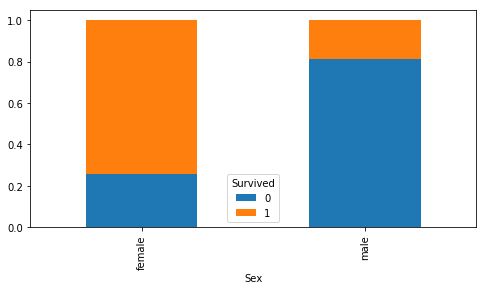

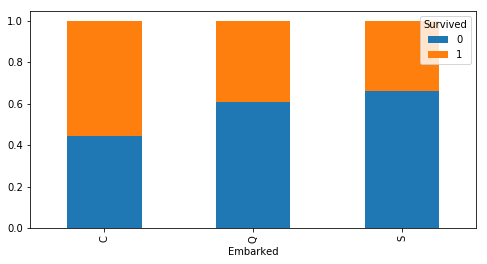

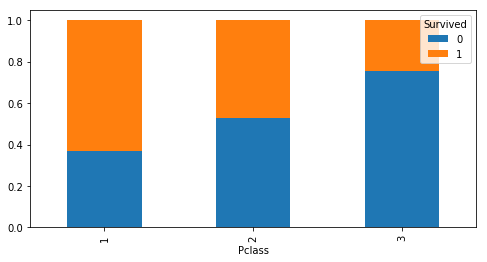

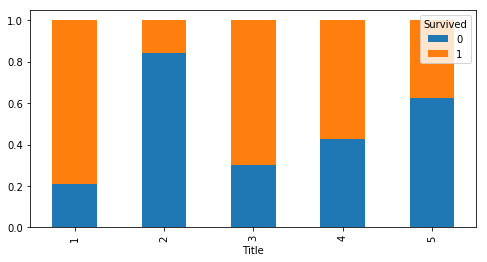

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)
for i in range(len(category_columns)):
    category = category_columns[i]    
    count_df = pd.crosstab(df[category],df['Survived'])
    ratio_df = count_df.divide(count_df.sum(axis = 1), axis=0)
    ratio_df.plot(kind='bar', stacked=True)

plt.show()

Cabin은 결측값이 너무 많아 컬럼 제거, 
PassengerID와 Name은 데이터 row의 unique id 이므로 분석에 활용 불가능하여 컬럼 제거 

### Numeric 변수 & Survived 시각화

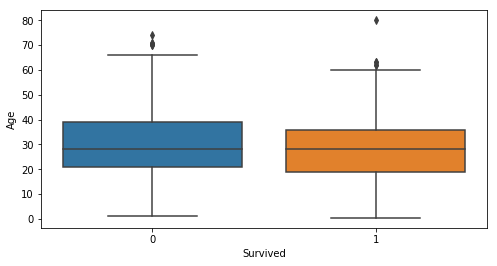

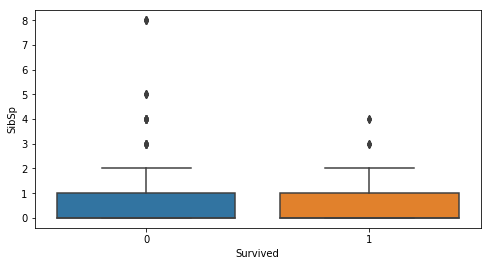

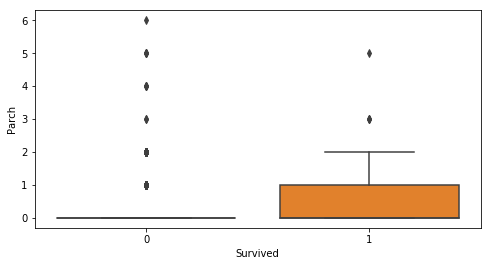

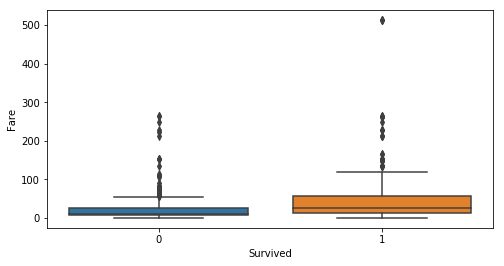

In [6]:
import seaborn as sns

for col in numeric_columns:
    ax = sns.boxplot(x="Survived", y=col, data=df)
    plt.show()

In [7]:
df.dropna(inplace=True)

# 3. Data Preprocessing
+ 카테고리 데이터: One-Hot Encoding
    + Sex, Ticket, Cabin, Embarked
+ 수치형 데이터: Min-Max Normalization
    + Age, SibSp, Parch, Fare
+ 순위형 데이터
    + Pclass

In [8]:
# 수치형 데이터 전처리: numeric_data
from sklearn.preprocessing import MinMaxScaler

numeric_data = df[numeric_columns]
scaler = MinMaxScaler()
scaler.fit(numeric_data)
numeric_data = scaler.transform(numeric_data)

In [9]:
# 카테고리 데이터 전처리: Label Encode -> One Hot Encode
import numpy as np
"""
INPUT : data (category가 포함된 array) 
OUTPUT : onehot_encoded (Label Encoding -> One Hot Encoding 된 array)
"""
def category_encoding(data):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    import numpy as np
    
    label_encoder = LabelEncoder()
    label_encoder.fit_transform(data)
    integer_encoded = label_encoder.fit_transform(data)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    return onehot_encoded

# category encoding: category_data

category_data = df[category_columns]
Sex_data = category_encoding(category_data['Sex'])
Embarked_data = category_encoding(category_data['Embarked'])
Pclass_data = category_encoding(category_data['Pclass'])
Title_data = category_encoding(category_data['Title'])

#category_data = np.hstack((Sex_data, Ticket_data, Embarked_data, Pclass_data))
category_data = np.hstack((Sex_data, Embarked_data, Pclass_data, Title_data))

In [10]:
# 레이블 데이터 전처리: Label data 
label_data = df['Survived']
label_data = label_data.reshape(len(label_data),1)

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# 데이터 합치기: numeric + category_data + label_data 
total_data = np.hstack((numeric_data, category_data, label_data))

# 4. Split Data

In [12]:
from sklearn.model_selection import train_test_split
target_data = total_data[:,-1]
input_data = total_data[:, :-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)

# 5. Train Model

# 5.1 SVM

In [14]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

#clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring= score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

Grid scores on development set:

0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 1e-05, 'C': 1}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
0.767 (+/-0.108) for {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
0.726 (+/-0.149) for {'kernel': 'rbf', 'gamma': 1, 'C': 1}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 1e-05, 'C': 10}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
0.781 (+/-0.111) for {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
0.747 (+/-0.160) for {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
0.740 (+/-0.191) for {'kernel': 'rbf', 'gamma': 1, 'C': 10}
0.692 (+/-0.008) for {'kernel': 'rbf', 'gamma': 1e-05, 'C': 100}
0.692 (+/-0.008) for {

# 5.2 Logistic Regression

In [15]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l1', 'l2'],'C': [1, 10, 100, 1000]}]

score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

#clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,scoring='%s_macro' % score)
clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,scoring= score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'penalty': 'l1', 'C': 1}

Grid scores on development set:

0.767 (+/-0.159) for {'penalty': 'l1', 'C': 1}
0.767 (+/-0.160) for {'penalty': 'l2', 'C': 1}
0.733 (+/-0.096) for {'penalty': 'l1', 'C': 10}
0.753 (+/-0.142) for {'penalty': 'l2', 'C': 10}
0.747 (+/-0.122) for {'penalty': 'l1', 'C': 100}
0.747 (+/-0.122) for {'penalty': 'l2', 'C': 100}
0.747 (+/-0.122) for {'penalty': 'l1', 'C': 1000}
0.747 (+/-0.122) for {'penalty': 'l2', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.69      0.73      0.71        15
        1.0       0.81      0.77      0.79        22

avg / total       0.76      0.76      0.76        37




# 5.3 Naive Bayes

In [16]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train model 
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_true = y_train

target_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=target_names))

print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.61      0.87      0.72        45
          1       0.93      0.75      0.83       101

avg / total       0.83      0.79      0.80       146

0.7876712328767124


# 5.4 Random Forest

In [17]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': [2, 4, 8, 10, 12, 16, 32, 64],
                     'min_samples_leaf':[2, 4, 8, 16, 32, 64]}]
    
score = 'f1'

print("# Tuning hyper-parameters for %s" % score)
print()

#clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,scoring='%s_macro' % score)
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,scoring=score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'max_depth': 16, 'min_samples_leaf': 2}

Grid scores on development set:

0.830 (+/-0.114) for {'max_depth': 2, 'min_samples_leaf': 2}
0.818 (+/-0.086) for {'max_depth': 2, 'min_samples_leaf': 4}
0.821 (+/-0.101) for {'max_depth': 2, 'min_samples_leaf': 8}
0.815 (+/-0.109) for {'max_depth': 2, 'min_samples_leaf': 16}
0.818 (+/-0.006) for {'max_depth': 2, 'min_samples_leaf': 32}
0.818 (+/-0.006) for {'max_depth': 2, 'min_samples_leaf': 64}
0.805 (+/-0.105) for {'max_depth': 4, 'min_samples_leaf': 2}
0.793 (+/-0.108) for {'max_depth': 4, 'min_samples_leaf': 4}
0.836 (+/-0.070) for {'max_depth': 4, 'min_samples_leaf': 8}
0.820 (+/-0.098) for {'max_depth': 4, 'min_samples_leaf': 16}
0.822 (+/-0.104) for {'max_depth': 4, 'min_samples_leaf': 32}
0.818 (+/-0.006) for {'max_depth': 4, 'min_samples_leaf': 64}
0.838 (+/-0.108) for {'max_depth': 8, 'min_samples_leaf': 2}
0.815 (+/-0.103) for {'max_depth': 8, 'min_sa

## 8.5 Airitificial Neural Network

In [18]:
X_train.shape

(146, 17)

In [19]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': [(8, 8), (8, 8, 8), (8, 8, 8, 8), (8, 8, 8, 8, 8)],
                     'alpha': [0.01, 0.1, 1, 10, 100]}]
    
score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

#clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score)
clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full developmelnt set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy



C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:

{'hidden_layer_sizes': (8, 8, 8), 'alpha': 1}

Grid scores on development set:

0.747 (+/-0.142) for {'hidden_layer_sizes': (8, 8), 'alpha': 0.01}
0.740 (+/-0.111) for {'hidden_layer_sizes': (8, 8, 8), 'alpha': 0.01}
0.705 (+/-0.146) for {'hidden_layer_sizes': (8, 8, 8, 8), 'alpha': 0.01}
0.747 (+/-0.175) for {'hidden_layer_sizes': (8, 8, 8, 8, 8), 'alpha': 0.01}
0.740 (+/-0.130) for {'hidden_layer_sizes': (8, 8), 'alpha': 0.1}
0.753 (+/-0.170) for {'hidden_layer_sizes': (8, 8, 8), 'alpha': 0.1}
0.726 (+/-0.183) for {'hidden_layer_sizes': (8, 8, 8, 8), 'alpha': 0.1}
0.726 (+/-0.157) for {'hidden_layer_sizes': (8, 8, 8, 8, 8), 'alpha': 0.1}
0.747 (+/-0.161) for {'hidden_layer_sizes': (8, 8), 'alpha': 1}
0.767 (+/-0.141) for {'hidden_layer_sizes': (8, 8, 8), 'alpha': 1}
0.733 (+/-0.107) for {'hidden_layer_sizes': (8, 8, 8, 8), 'alpha': 1}
0.767 (+/-0.140) for {'hidden_layer_sizes': (8, 8, 8, 8, 8), 'alpha': 1}
0.692 (+/-0.008) for {'hidden_l